In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

# <img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
dimension_size = 2
order = 5
array_order5 = np.array([5] * dimension_size**order).reshape((dimension_size,)*order)
tensor_order5 = Tensor(array_order5)
print(array_order5)
tensor_order5

[[[[[5 5]
    [5 5]]

   [[5 5]
    [5 5]]]


  [[[5 5]
    [5 5]]

   [[5 5]
    [5 5]]]]



 [[[[5 5]
    [5 5]]

   [[5 5]
    [5 5]]]


  [[[5 5]
    [5 5]]

   [[5 5]
    [5 5]]]]]


This tensor is of order 5 and consists of 32 elements.
Sizes and names of its modes are (2, 2, 2, 2, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.

In [5]:
tensor_order5.frob_norm

28.284271247461902

### Solution: Part 2

In [6]:
tensor_sz_list = []
orders = []
dimension_size = 2
for order in range (3,21):
    temp_array = np.array(([1] * (dimension_size**order))).reshape((dimension_size,)* order)
    temp_tensor = Tensor(temp_array)
    tensor_sz_list.append(temp_tensor.size)
    orders.append(order)

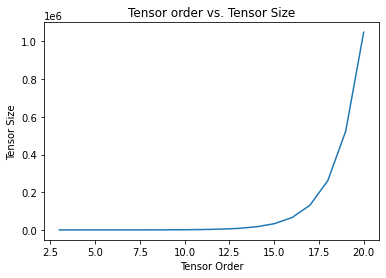

In [7]:
plt.plot(orders, tensor_sz_list)
plt.title('Tensor order vs. Tensor Size')
plt.xlabel('Tensor Order')
plt.ylabel('Tensor Size')
plt.show()

### Solution: Part 3

In [8]:
tensor_sz_list = []
dimension_size_list = []
order = 3
for dimension_size in range (3,16):
    temp_array = np.array(([1] * (dimension_size**order))).reshape((dimension_size,)* order)
    temp_tensor = Tensor(temp_array)
    tensor_sz_list.append(temp_tensor.size)
    dimension_size_list.append(dimension_size)

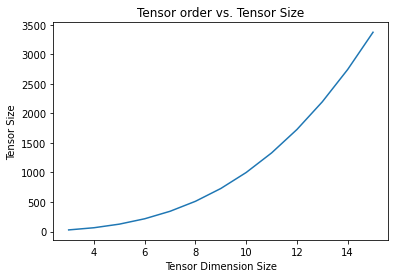

In [9]:
plt.plot(dimension_size_list, tensor_sz_list)
plt.title('Tensor order vs. Tensor Size')
plt.xlabel('Tensor Dimension Size')
plt.ylabel('Tensor Size')
plt.show()

### Solution: Part 4

If a tensor has the same size for every order, as in the examples above, the number of elements is given by: 

\begin{equation}
    N = n^D
\end{equation}

where n is the Dimension Size, and D is the Tensor Order.

From the plots and mathematical formulation it is evident that both increases in dimension and tensor order lead to nonlinear increase in complexity. Tensor order tends to lead to more significant growth in complexity as it affects the exponent.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [12]:
array_4d = np.arange(81).reshape((3, 3, 3, 3))
tensor = Tensor(array_4d)
print(tensor)
tensor.data

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

In [13]:
for index_m0 in range(0, tensor.shape[0]):
    print(f'Slice {index_m0}:')
    print(tensor.data[index_m0, :, :, :])

Slice 0:
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
Slice 1:
[[[27 28 29]
  [30 31 32]
  [33 34 35]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]]]
Slice 2:
[[[54 55 56]
  [57 58 59]
  [60 61 62]]

 [[63 64 65]
  [66 67 68]
  [69 70 71]]

 [[72 73 74]
  [75 76 77]
  [78 79 80]]]


In [14]:
print("Row Index: ", str((0, 0, 0))," | Data: ",tensor.data[0,:,0,0], "\n")
print("Row Index: ", str((1, 0, 0))," | Data: ",tensor.data[1,:,0,0], "\n")
print("Row Index: ", str((0, 1, 0))," | Data: ",tensor.data[0,:,1,0], "\n")
print("Row Index: ", str((0, 0, 1))," | Data: ",tensor.data[0,:,0,1], "\n")

Row Index:  (0, 0, 0)  | Data:  [ 0  9 18] 

Row Index:  (1, 0, 0)  | Data:  [27 36 45] 

Row Index:  (0, 1, 0)  | Data:  [ 3 12 21] 

Row Index:  (0, 0, 1)  | Data:  [ 1 10 19] 



### Solution: Part 2

In [15]:
tensor = Tensor(np.ones([4, 2, 5]))
for frontal_index in range(0, tensor.shape[-1]):
    tensor.data[:, :, frontal_index] = np.dot(tensor.data[:, :, frontal_index], 2 ** frontal_index)
print(tensor)
tensor.data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]],

       [[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]],

       [[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]],

       [[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]]])

# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
tensor  = Tensor(np.arange(6 * 5 * 4 * 3).reshape(6, 5, 4, 3))

In [18]:
tensor.unfold(mode=1).data[:].shape

(5, 72)

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
tensor = Tensor(np.arange(5 * 4 * 4).reshape(5, 4, 4))
print(tensor)

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (5, 4, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [21]:
tensor_2 = Tensor(np.arange(5 * 4).reshape(5, 4))
print(tensor_2)

This tensor is of order 2 and consists of 20 elements.
Sizes and names of its modes are (5, 4) and ['mode-0', 'mode-1'] respectively.


In [22]:
tensor_prod = tensor.mode_n_product(tensor_2,mode=1,inplace=False)
print(tensor_prod)

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (5, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [23]:
tensor.mode_n_product(tensor_2,mode=1,inplace=True)
print(tensor_prod == tensor)
print("Inplace returns to the multiplied tensor object rather than a new variable")

True
Inplace returns to the multiplied tensor object rather than a new variable


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
tensor = Tensor(np.arange(1 * 2 * 3).reshape(1, 2, 3))

In [25]:
# Create matrices
matrix_a = Tensor(np.arange(2 * 1).reshape(2, 1))
matrix_b = Tensor(np.arange(3 * 2).reshape(3, 2))

In [26]:
property_1_left = tensor.mode_n_product(matrix_a, mode=0, inplace=False).mode_n_product(matrix_b, mode=1, inplace=False)
property_1_right = tensor.mode_n_product(matrix_b, mode=1, inplace=False).mode_n_product(matrix_a, mode=0, inplace=False)
np.array_equal(property_1_left, property_1_right)

True

In [28]:
# Validate property 2
property_2_left = tensor.mode_n_product(matrix_a, mode=0, inplace=False).mode_n_product(matrix_b, mode=0, inplace=False)
property_2_right = tensor.mode_n_product(np.matmul(matrix_b.data, matrix_a.data), mode=0, inplace=False)
np.array_equal(property_2_left, property_2_right)

True

### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [29]:
%%latex
Start with the equality:
    $$
\underline{\mathbf{Y}} = \underline{\mathbf{X}} \times_{n} \mathbf{A} \quad \Leftrightarrow \quad \mathbf{Y}_{(n)}=\mathbf{A} \mathbf{X}_{(n)}
$$
And equality 2
$$
\underline{\mathbf{Z}} = \underline{\mathbf{Y}} \times_{n} \mathbf{B} \quad \Leftrightarrow \quad \mathbf{Z}_{(n)}=\mathbf{B} \mathbf{Y}_{(n)}
$$
Substitute 1 into 2:
$$
\underline{\mathbf{X}} \times_{n} (\mathbf{B} \mathbf{A}) \Leftrightarrow \mathbf{B} \mathbf{A} \mathbf{X}_{(n)}
$$
Rewriting:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$
Hence Proved

<IPython.core.display.Latex object>